## __Data Wrangling__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('AusApparalSales4thQrt2020.csv')
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [3]:
print(df.shape)
print(df.columns)

(7560, 6)
Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')


In [4]:
missing_values=df.isnull().sum()
print(missing_values)

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


Data does not contain any missing values


In [5]:
df.drop_duplicates().shape


(7560, 6)

Data does not contain duplicate values

In [6]:
df['Noramalized_Sales']=(df['Sales']-df['Sales'].min())/(df['Sales'].max()-df['Sales'].min())
df.head()

,Date,Time,State,Group,Unit,Sales,Noramalized_Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873


In [7]:
df_time=df.groupby('Time')['Sales'].agg(['mean','median','min','max','std','var']).reset_index()
df_time

,Time,mean,median,min,max,std,var
0,Afternoon,45241.071429,35000.0,5000,162500,32318.429186,1.044481e+09
1,Evening,44479.166667,35000.0,5000,162500,32086.902866,1.029569e+09
2,Morning,45320.436508,35000.0,5000,162500,32360.627334,1.047210e+09


In [8]:
print(df_time[df_time['mean']==df_time['mean'].max()]['Time'])

2     Morning
Name: Time, dtype: object


Maximum Average Sales happen in Morning then foolowed by Afternoon and Evening


In [9]:
df['Date']=pd.to_datetime(df['Date'])


In [10]:
print(df['Date'].dtype)


datetime64[ns]


In [11]:
df_date=df.groupby('Date')['Sales'].agg(['mean','median','min','max','std','var']).reset_index()
df_date

,Date,mean,median,min,max,std,var
0,2020-10-01,44285.714286,36250.0,7500,125000,29584.398945,8.752367e+08
1,2020-10-02,44226.190476,32500.0,7500,120000,29846.434749,8.908097e+08
2,2020-10-03,46309.523810,33750.0,7500,125000,32033.200469,1.026126e+09
3,2020-10-04,44285.714286,37500.0,7500,115000,25845.845803,6.680077e+08
4,2020-10-05,45982.142857,36250.0,7500,110000,29437.543280,8.665690e+08
...,...,...,...,...,...,...,...
85,2020-12-26,56130.952381,43750.0,12500,160000,39609.168879,1.568886e+09
86,2020-12-27,55208.333333,38750.0,12500,155000,38158.294929,1.456055e+09
87,2020-12-28,54702.380952,40000.0,12500,162500,38292.636608,1.466326e+09
88,2020-12-29,54851.190476,40000.0,12500,162500,36656.890061,1.343728e+09


In [13]:
print(df_date[df_date['mean']==df_date['mean'].max()]['Date'])
print(df_date[df_date['median']==df_date['median'].max()]['Date'])

73   2020-12-14
Name: Date, dtype: datetime64[ns]
85   2020-12-26
Name: Date, dtype: datetime64[ns]


In [14]:
df['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [15]:
df_state=df.groupby('State')['Sales'].agg(['mean','median','std','min','max','sum']).reset_index()
df_state

,State,mean,median,std,min,max,sum
0,NSW,69416.666667,70000.0,20626.651646,30000,112500,74970000
1,NT,20907.407407,20000.0,8961.907893,5000,37500,22580000
2,QLD,30942.129630,30000.0,13344.638002,7500,62500,33417500
3,SA,54497.685185,52500.0,17460.965183,25000,87500,58857500
4,TAS,21074.074074,20000.0,9024.684205,5000,37500,22760000
5,VIC,97745.370370,95000.0,26621.597092,50000,162500,105565000
6,WA,20511.574074,20000.0,9231.905897,5000,37500,22152500


In [16]:
print(df_state[df_state['mean']==df_state['mean'].max()]['State'])
print(df_state[df_state['median']==df_state['median'].max()]['State'])

5     VIC
Name: State, dtype: object
5     VIC
Name: State, dtype: object


The maximum average Sales happens in state VIC

In [17]:
df_group=df.groupby('Group')['Sales'].agg(['mean','median','std','min','max']).reset_index()
df_group

,Group,mean,median,std,min,max
0,Kids,45011.904762,35000.0,31871.491085,5000,162500
1,Men,45370.370370,35000.0,32177.180712,5000,160000
2,Seniors,44464.285714,35000.0,32195.360017,5000,162500
3,Women,45207.671958,35000.0,32781.639869,5000,162500


In [18]:
print(df_group[df_group['mean']==df_group['mean'].max()]['Group'])

1     Men
Name: Group, dtype: object


In [19]:
df_unit=df.groupby('Unit')['Sales'].agg(['mean','median','std','min','max']).reset_index()
df_unit

,Unit,mean,median,std,min,max
0,2,5000.0,5000.0,0.0,5000,5000
1,3,7500.0,7500.0,0.0,7500,7500
2,4,10000.0,10000.0,0.0,10000,10000
3,5,12500.0,12500.0,0.0,12500,12500
4,6,15000.0,15000.0,0.0,15000,15000
...,...,...,...,...,...,...
59,61,152500.0,152500.0,0.0,152500,152500
60,62,155000.0,155000.0,0.0,155000,155000
61,63,157500.0,157500.0,0.0,157500,157500
62,64,160000.0,160000.0,0.0,160000,160000


## __Data Analysis__

In [20]:
df[['Unit','Sales']].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [21]:
print('Mean of Unit :- ',df['Unit'].mean())
print('Median of Unit :- ',df['Unit'].median())
print('Mode of Unit :- ',df['Unit'].mode())
print('Mean of Sales :- ',df['Sales'].mean())
print('Median of Sales :- ',df['Sales'].median())
print('Mode of Sales :- ',df['Sales'].mode())

Mean of Unit :-  18.00542328042328
Median of Unit :-  14.0
Mode of Unit :-  0    9
Name: Unit, dtype: int64
Mean of Sales :-  45013.5582010582
Median of Sales :-  35000.0
Mode of Sales :-  0    22500
Name: Sales, dtype: int64


In [22]:
print('Group with highest Sales :- \n',df[df['Sales']==df['Sales'].max()]['Group'])
print('Group with lowest Sales :- \n',df[df['Sales']==df['Sales'].min()]['Group'])

Group with highest Sales :- 
 5423     Seniors
5759     Seniors
5842       Women
6174       Women
6340        Kids
6598       Women
6931     Seniors
7019     Seniors
7354       Women
7432        Kids
7515     Seniors
Name: Group, dtype: object
Group with lowest Sales :- 
 2533         Men
2537         Men
2542       Women
2594       Women
2603     Seniors
          ...   
4884        Kids
4945         Men
4973         Men
4975     Seniors
5039     Seniors
Name: Group, Length: 130, dtype: object


In [23]:
daily_sales_reports=df.groupby('Date')['Sales'].agg(['sum']).reset_index()
daily_unit_reports=df.groupby('Date')['Unit'].agg(['sum']).reset_index()
daily_reports=pd.merge(daily_unit_reports,daily_sales_reports,how='inner',on='Date')
daily_reports.columns=['Date','Unit','Sales']
daily_reports

,Date,Unit,Sales
0,2020-10-01,1488,3720000
1,2020-10-02,1486,3715000
2,2020-10-03,1556,3890000
3,2020-10-04,1488,3720000
4,2020-10-05,1545,3862500
...,...,...,...
85,2020-12-26,1886,4715000
86,2020-12-27,1855,4637500
87,2020-12-28,1838,4595000
88,2020-12-29,1843,4607500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


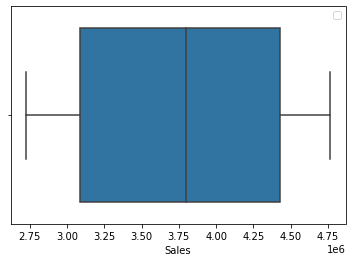

In [24]:
sns.boxplot(data=daily_reports,x='Sales')
plt.legend()
plt.show()

In [25]:
from statsmodels.stats.stattools import medcouple
from statsmodels.stats.stattools import robust_kurtosis
for x in df['State'].unique():
    skewness=medcouple(df[df['State']==x]['Sales'])
    print(skewness)

0.0
0.0
0.1111111111111111
0.07142857142857142
0.0
-0.04
0.07692307692307693


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


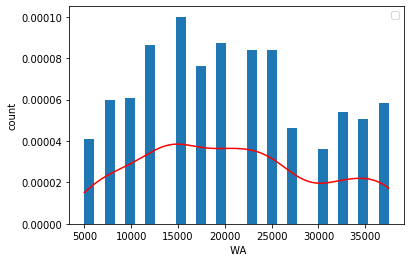

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


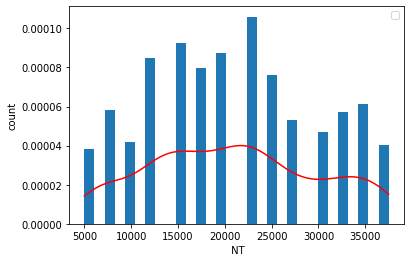

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


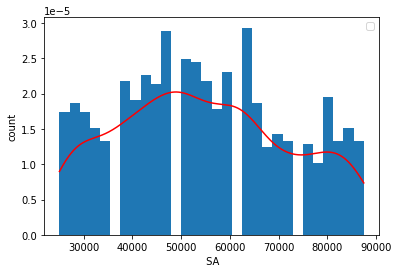

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


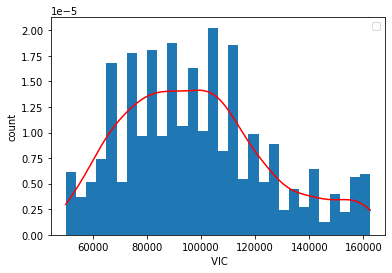

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


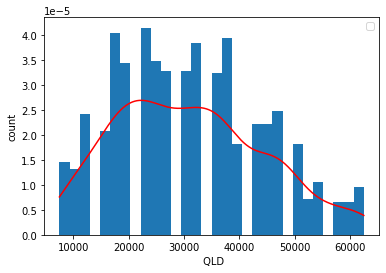

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


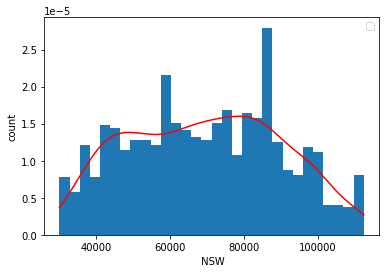

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


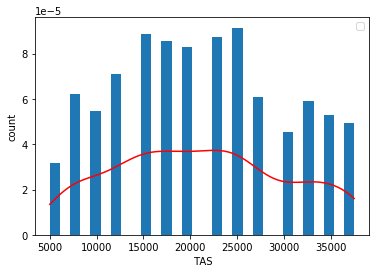

In [31]:
from scipy.stats import gaussian_kde
for x in df['State'].unique():
    plt.hist(df[df['State']==x]['Sales'],density=True,bins=30)
    kde=gaussian_kde(df[df['State']==x]['Sales'])
    kde_xs=np.linspace(df[df['State']==x]['Sales'].min(),df[df['State']==x]['Sales'].max(),1000)
    kde_ys=kde(kde_xs)
    plt.plot(kde_xs,kde_ys,color='red')
    plt.xlabel(x)
    plt.ylabel('count')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


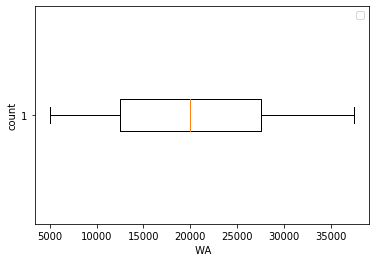

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


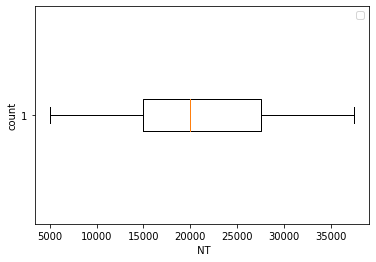

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


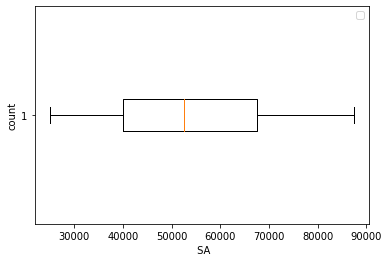

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


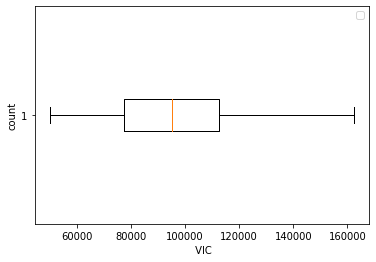

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


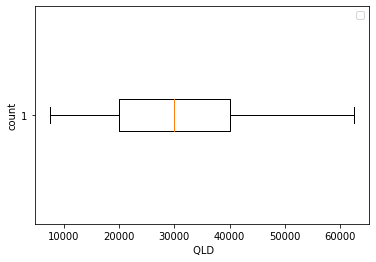

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


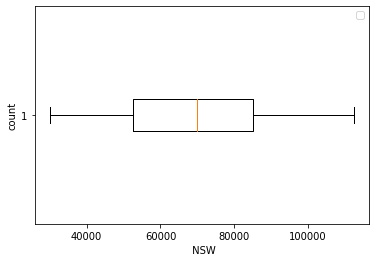

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


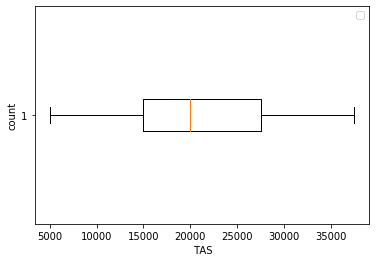

In [30]:
from scipy.stats import gaussian_kde
for x in df['State'].unique():
    plt.boxplot(df[df['State']==x]['Sales'],vert=False)
    plt.xlabel(x)
    plt.ylabel('count')
    plt.legend()
    plt.show()

The Sales dataset does not contain any outlier


In [49]:
week_day=pd.date_range(start='2020-10-01',end='2020-12-30',freq='7D')

In [50]:
count=1
for x in week_day:
    for y in pd.date_range(start=x,periods=7,freq='D'):
        daily_reports.loc[daily_reports['Date']==y,'Week_category']=str(count)
    count=count+1
daily_reports

,Date,Unit,Sales,Week_category,Month_category
0,2020-10-01,1488,3720000,1,1
1,2020-10-02,1486,3715000,1,1
2,2020-10-03,1556,3890000,1,1
3,2020-10-04,1488,3720000,1,1
4,2020-10-05,1545,3862500,1,1
...,...,...,...,...,...
85,2020-12-26,1886,4715000,13,3
86,2020-12-27,1855,4637500,13,3
87,2020-12-28,1838,4595000,13,3
88,2020-12-29,1843,4607500,13,3


In [51]:
weekly_reports=daily_reports.groupby('Week_category')[['Sales','Unit']].agg(['sum','mean','median','std','var','min','max']).reset_index()
weekly_reports

Week_category     Sales                                          \
                       sum          mean     median            std   
0              1  26580000  3.797143e+06  3720000.0  104267.570176   
1             10  31022500  4.431786e+06  4482500.0  212042.224007   
2             11  31917500  4.559643e+06  4605000.0  168593.622429   
3             12  31242500  4.463214e+06  4452500.0  100702.886893   
4             13  32117500  4.588214e+06  4595000.0   98527.854413   
5              2  27070000  3.867143e+06  3872500.0  120816.911856   
6              3  26577500  3.796786e+06  3795000.0  113143.661313   
7              4  26437500  3.776786e+06  3735000.0  110299.915814   
8              5  19390000  3.231667e+06  3081250.0  471133.385218   
9              6  20910000  2.987143e+06  2992500.0  127625.988173   
10             7  21545000  3.077857e+06  3060000.0  131501.176891   
11             8  21110000  3.015714e+06  3022500.0  107312.960208   
12             9  24382500  3.483214e+06  3075000.0  709927.687464   

                                     Unit                                   \
             var      min      max    sum         mean  median         std   
0   1.087173e+10  3712500  3960000  10632  1518.857143  1488.0   41.707028   
1   4.496190e+10  4060000  4655000  12409  1772.714286  1793.0   84.816890   
2   2.842381e+10  4327500  4765000  12767  1823.857143  1842.0   67.437449   
3   1.014107e+10  4335000  4635000  12497  1785.285714  1781.0   40.281155   
4   9.707738e+09  4390000  4715000  12847  1835.285714  1838.0   39.411142   
5   1.459673e+10  3645000  4005000  10828  1546.857143  1549.0   48.326765   
6   1.280149e+10  3652500  3960000  10631  1518.714286  1518.0   45.257465   
7   1.216607e+10  3662500  3977500  10575  1510.714286  1494.0   44.119966   
8   2.219667e+11  2725000  3822500   7756  1292.666667  1232.5  188.453354   
9   1.628839e+10  2835000  3210000   8364  1194.857143  1197.0   51.050395   
10  1.729256e+10  2877500  3290000   8618  1231.142857  1224.0   52.600471   
11  1.151607e+10  2867500  3185000   8444  1206.285714  1209.0   42.925184   
12  5.039973e+11  2982500  4565000   9753  1393.285714  1230.0  283.971075   

                              
             var   min   max  
0    1739.476190  1485  1584  
1    7193.904762  1624  1862  
2    4547.809524  1731  1906  
3    1622.571429  1734  1854  
4    1553.238095  1756  1886  
5    2335.476190  1458  1602  
6    2048.238095  1461  1584  
7    1946.571429  1465  1591  
8   35514.666667  1090  1529  
9    2606.142857  1134  1284  
10   2766.809524  1151  1316  
11   1842.571429  1147  1274  
12  80639.571429  1193  1826

In [52]:
weekly_reports=weekly_reports.set_index('Week_category')

In [53]:
month_day=pd.date_range(start='2020-10-01',end='2020-12-29',freq='30D')

In [54]:
count=1
for x in month_day:
    for y in pd.date_range(start=x,periods=31,freq='D'):
        daily_reports.loc[daily_reports['Date']==y,'Month_category']=str(count)
    count=count+1
daily_reports

,Date,Unit,Sales,Week_category,Month_category
0,2020-10-01,1488,3720000,1,1
1,2020-10-02,1486,3715000,1,1
2,2020-10-03,1556,3890000,1,1
3,2020-10-04,1488,3720000,1,1
4,2020-10-05,1545,3862500,1,1
...,...,...,...,...,...
85,2020-12-26,1886,4715000,13,3
86,2020-12-27,1855,4637500,13,3
87,2020-12-28,1838,4595000,13,3
88,2020-12-29,1843,4607500,13,3


In [55]:
monthly_report=daily_reports.groupby('Month_category')[['Sales','Unit']].agg(['sum','mean','median','min','max','std','var']).reset_index()
monthly_report

Month_category      Sales                                             \
                        sum          mean     median      min      max   
0              1  114290000  3.809667e+06  3798750.0  3645000  4005000   
1              2   87647500  3.022328e+06  3022500.0  2725000  3290000   
2              3  138365000  4.463387e+06  4505000.0  3035000  4765000   

                                 Unit                                   \
             std           var    sum         mean  median   min   max   
0  107604.667035  1.157876e+10  45716  1523.866667  1519.5  1458  1602   
1  130186.903820  1.694863e+10  35059  1208.931034  1209.0  1090  1316   
2  305010.620298  9.303148e+10  55346  1785.354839  1802.0  1214  1906   

                             
          std           var  
0   43.041867   1852.602299  
1   52.074762   2711.780788  
2  122.004248  14885.036559

## __Data Visualization__


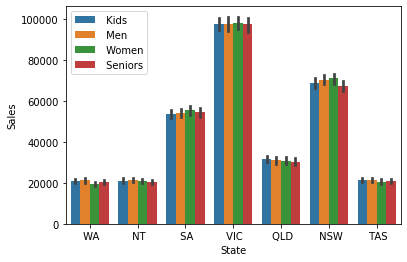

In [39]:
sns.barplot(data=df,x='State',y='Sales',hue='Group')
plt.legend()
plt.show()

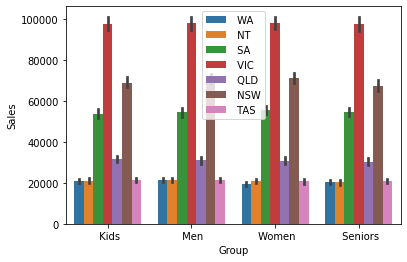

In [40]:
sns.barplot(data=df,x='Group',y='Sales',hue='State')
plt.legend()
plt.show()

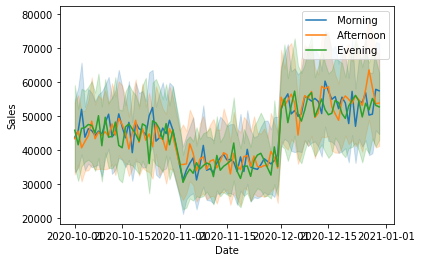

In [41]:
sns.lineplot(data=df,x='Date',y='Sales',hue='Time')
plt.legend()
plt.show()

In [42]:
weekly_sales_reports=weekly_reports['Sales'].reset_index()
weekly_sales_reports

,Week_category,sum,mean,median,std,var,min,max
0,1,26580000,3.797143e+06,3720000.0,104267.570176,1.087173e+10,3712500,3960000
1,10,31022500,4.431786e+06,4482500.0,212042.224007,4.496190e+10,4060000,4655000
2,11,31917500,4.559643e+06,4605000.0,168593.622429,2.842381e+10,4327500,4765000
3,12,31242500,4.463214e+06,4452500.0,100702.886893,1.014107e+10,4335000,4635000
4,13,32117500,4.588214e+06,4595000.0,98527.854413,9.707738e+09,4390000,4715000
5,2,27070000,3.867143e+06,3872500.0,120816.911856,1.459673e+10,3645000,4005000
6,3,26577500,3.796786e+06,3795000.0,113143.661313,1.280149e+10,3652500,3960000
7,4,26437500,3.776786e+06,3735000.0,110299.915814,1.216607e+10,3662500,3977500
8,5,19390000,3.231667e+06,3081250.0,471133.385218,2.219667e+11,2725000,3822500
9,6,20910000,2.987143e+06,2992500.0,127625.988173,1.628839e+10,2835000,3210000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


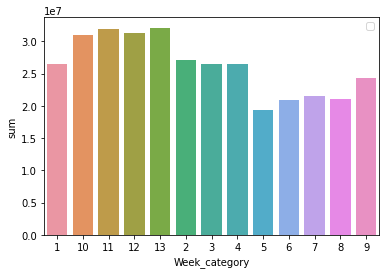

In [43]:
sns.barplot(data=weekly_sales_reports,x='Week_category',y='sum')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


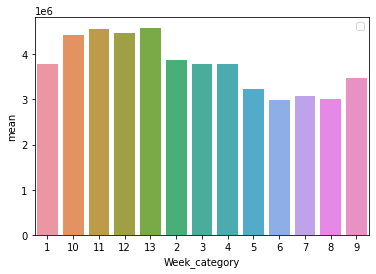

In [44]:
sns.barplot(data=weekly_sales_reports,x='Week_category',y='mean')
plt.legend()
plt.show()

In [56]:
monthly_report=monthly_report.set_index(['Month_category'])

In [57]:
monthly_report


Sales                                             \
                      sum          mean     median      min      max   
Month_category                                                         
1               114290000  3.809667e+06  3798750.0  3645000  4005000   
2                87647500  3.022328e+06  3022500.0  2725000  3290000   
3               138365000  4.463387e+06  4505000.0  3035000  4765000   

                                              Unit                             \
                          std           var    sum         mean  median   min   
Month_category                                                                  
1               107604.667035  1.157876e+10  45716  1523.866667  1519.5  1458   
2               130186.903820  1.694863e+10  35059  1208.931034  1209.0  1090   
3               305010.620298  9.303148e+10  55346  1785.354839  1802.0  1214   

                                                
                 max         std           var  
Month_category                                  
1               1602   43.041867   1852.602299  
2               1316   52.074762   2711.780788  
3               1906  122.004248  14885.036559

In [58]:
monthly_sales_report=monthly_report['Sales'].reset_index()
monthly_sales_report

,Month_category,sum,mean,median,min,max,std,var
0,1,114290000,3.809667e+06,3798750.0,3645000,4005000,107604.667035,1.157876e+10
1,2,87647500,3.022328e+06,3022500.0,2725000,3290000,130186.903820,1.694863e+10
2,3,138365000,4.463387e+06,4505000.0,3035000,4765000,305010.620298,9.303148e+10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


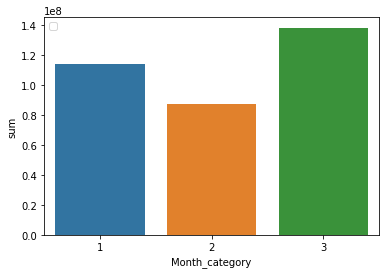

In [59]:
sns.barplot(data=monthly_sales_report,x='Month_category',y='sum')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


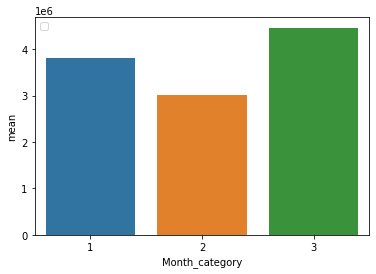

In [60]:
sns.barplot(data=monthly_sales_report,x='Month_category',y='mean')
plt.legend()
plt.show()

Maximum Sales happens in month of December
